# Case Study : Health Insurance Cost Prediction

# Project Main Objective 

- **Predict the Insurance price of New user.**.



# Project steps are 
1. Data Collectiion
2. Data Understanding
3. Exploratory Data Analysis
4. Data Modeling and Preprocessing
5. Making Prediction on New Data
6. Converting Model Building to GUI application

In [4]:
# import required libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

# remove warnings 
import warnings
warnings.filterwarnings("ignore")

## 1. Collecting Data

In [5]:
insurance = pd.read_csv("insurance.csv")

## 2. Understanding of Data

In [6]:
df = insurance.copy()
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [122]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


In [7]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1146,60,male,32.800,0,yes,southwest,52590.82939
329,52,male,36.700,0,no,southwest,9144.56500
426,38,female,27.265,1,no,northeast,6555.07035
1267,24,male,31.065,0,yes,northeast,34254.05335
900,49,male,22.515,0,no,northeast,8688.85885
244,63,female,27.740,0,yes,northeast,29523.16560
859,57,male,28.100,0,no,southwest,10965.44600
546,28,male,35.435,0,no,northeast,3268.84665
1257,54,female,27.645,1,no,northwest,11305.93455
1164,41,female,28.310,1,no,northwest,7153.55390


In [8]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


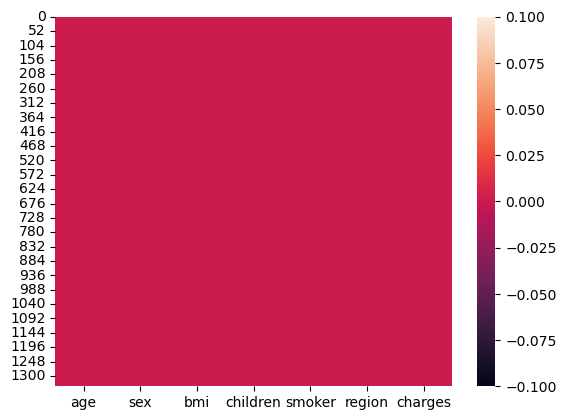

In [12]:
# visualising the missing value
sns.heatmap(df.isna())
plt.show()

`Insight`

- This is a **isurance dataset**, in which have, **1338 entries for 7 columns**.
- **charges** is our predictor variable. 
- dataset contains **4 numeical and 3 categorical columns**.
- There are **no missing value** in the dataset.

## 3. EDA ( Exploratory Data Analysis)

**Some information regarding to the variables**

- **age** : age of the person.
- **sex** : Gender of the person. (person may be male or female)
- **bmi** : Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women
- **children** : how many children the person have.
- **smoker** : The person do smoke or not.
- **region** : which region the person belongs.
- **charges** : What is the cost for the person. (prices)

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 1. Univariate Analysis

### 1.1 Numerical/Float features analysis

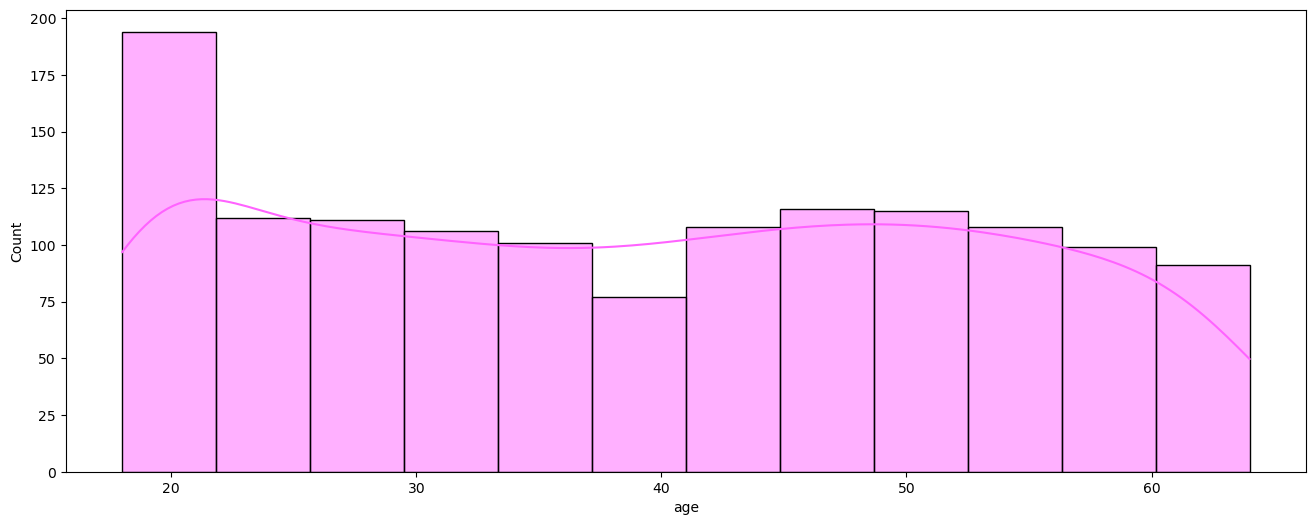

In [15]:
# distribution of variables
plt.figure(figsize=(16,6))
sns.histplot(df.age,kde=True ,color="#ff63ff")
plt.show()

In [22]:
df.age.value_counts(ascending=True).sort_index(ascending=True)

18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

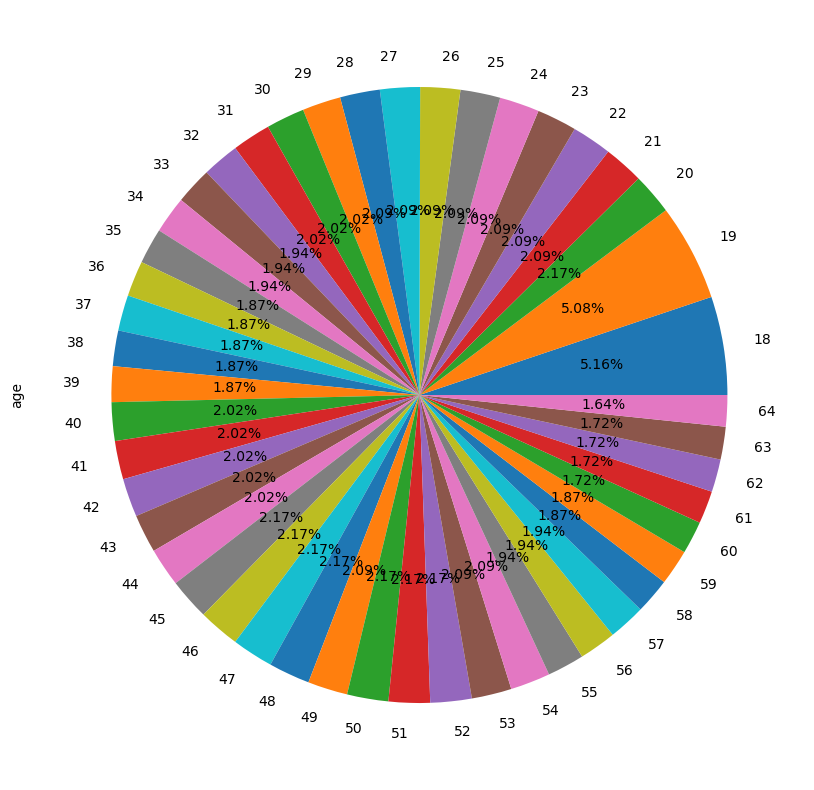

In [23]:
plt.figure(figsize=(16,10))
df.age.value_counts(ascending=True).sort_index(ascending=True).plot(kind="pie",autopct="%0.2f%%")
plt.show()

`Insight`

*  **Most of the 18 age** persons in the dataset.
* Approximately **22% peoples are the youngers**. they fall at **18 and 25 age only**.
* **All ages person have same kind of pattern of ages except 18 and 19 ages**.

In [24]:
df.bmi.value_counts().head(5)

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
Name: bmi, dtype: int64

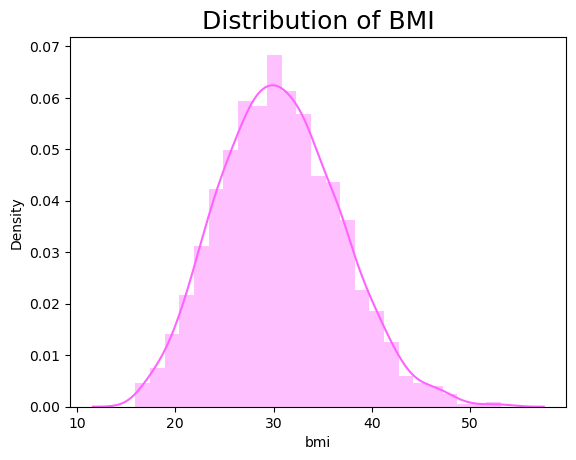

In [25]:
# distribution of bmi
plt.title("Distribution of BMI",size=18)
sns.distplot(df.bmi,color="#ff63ff")
plt.show()

`Insight`
- **Distribution of bmi is normal**. It look like bell curve.
- In this graphs, **All the values are at 32 bmi**. 

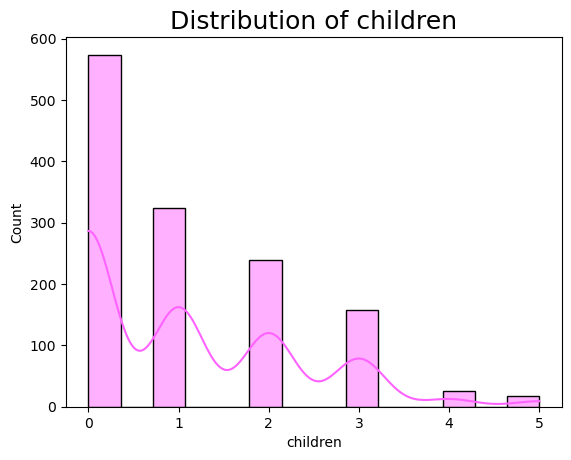

In [26]:
plt.title("Distribution of children", size=18)
sns.histplot(df.children,kde=True, color="#ff63ff")
plt.show()

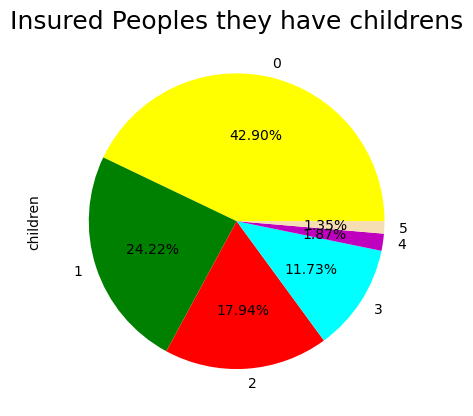

In [27]:
plt.title("Insured Peoples they have childrens", size=18)
df.children.value_counts().plot.pie(autopct="%0.2f%%",colors=["yellow","green","red","cyan","m","wheat"])
plt.show()

`Insight`

* From the distribution plot, we can say **550+** peoples **they have no any childrens**.This kind of peoples are **~43%**. **(It may be unmarried, Others they don't want child at this age).**
* **300+** peoples **they have only one child**. This kind of peoples are **24%**.
* **1.35%** peoples have **5** childrens.

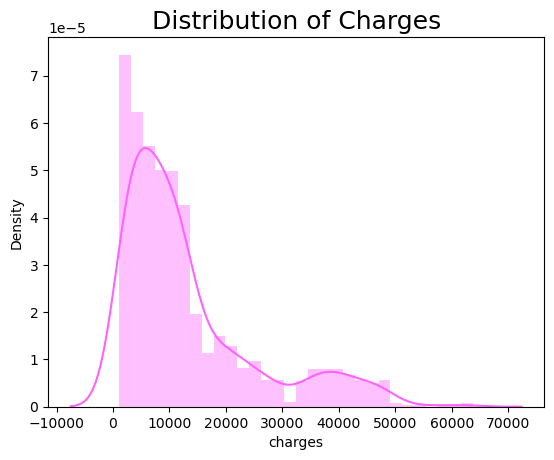

In [28]:
# Distribution of Charges
plt.title("Distribution of Charges", size=18)
sns.distplot(df.charges,color="#ff63ff")
plt.show()

`Insight`

*  From this plot, the **distribution of charges are right skewed**. Hence it skewed at charge ( 0, 10000).
*  **Younger peoples have low charges than older peoples**. Hence most people are at the age of 18 and 19.

### 1.2 Categorical feature analysis

In [29]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
 1   smoker  1338 non-null   object
 2   region  1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


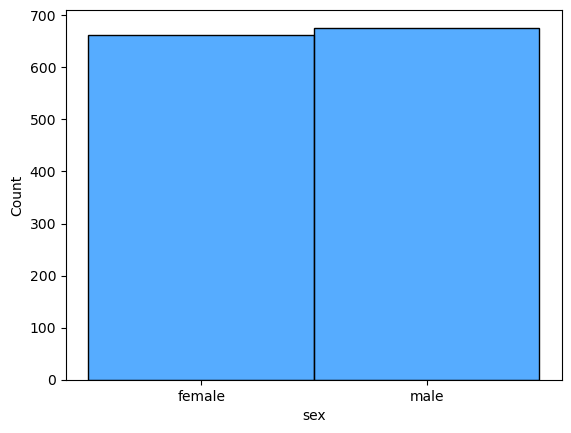

In [30]:
#distribution of sex
sns.histplot(df.sex,color="dodgerblue", legend=True)
plt.show()

`Insight`

- From the bar plot,The gender number are same numbers of male and female. **Males are slightly more than female**.

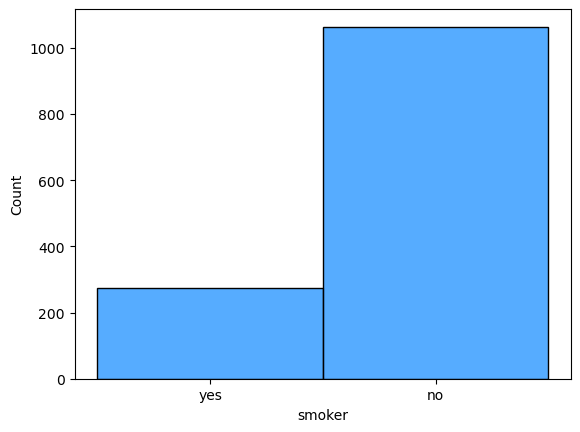

In [31]:
#distribution of smoker
sns.histplot(df.smoker,color="dodgerblue")#,palette="viridis", legend=True)
plt.show()

`Insight`

- From this plot, we can say **more peoples they don't smoke**. **Unsmoker are more than smoker**.
- **approx 300** peoples they do smoke.

<AxesSubplot:xlabel='region', ylabel='Count'>

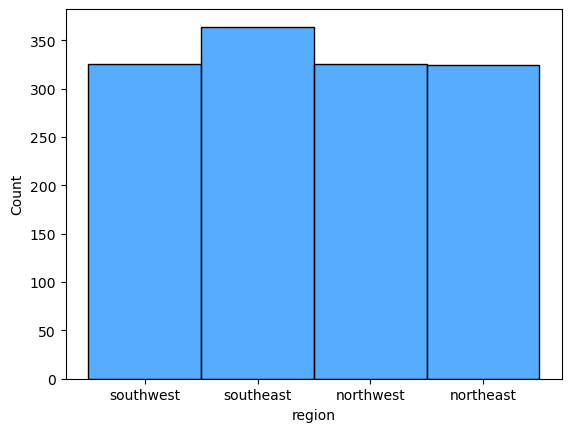

In [33]:
# distribuion of region
sns.histplot(df.region, color="dodgerblue")

`Insight`

- **southeast peoples are more than other 3 regions**
- **Other 3 regions peoples have same numbers of peoples**.


## 2. Bivariate Analysis

### 2.1 Analysis of variables with other variables

In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [35]:
print("Difference of age is  :", df.age.max() - df.age.min())
print("Difference of charge is  :",df.charges.max() - df.charges.min())

Difference of age is  : 46
Difference of charge is  : 62648.554110000005


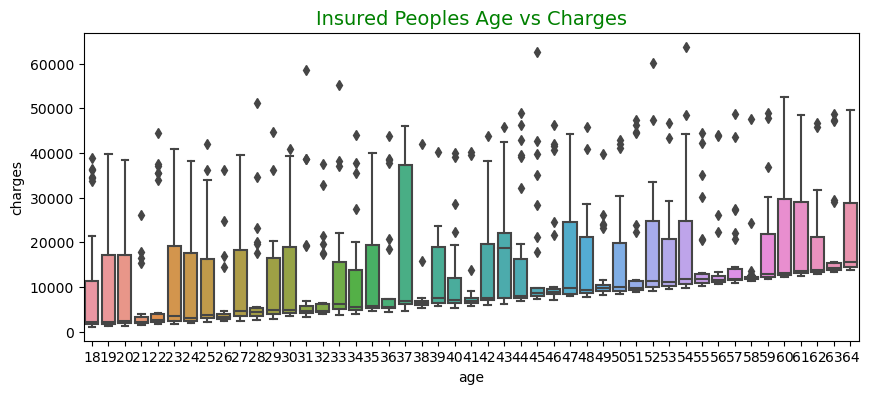

In [36]:
plt.figure(figsize=(10,4))
plt.title("Insured Peoples Age vs Charges", size=14, color="green")
sns.boxplot(x="age", y= df.columns[-1], data=df)
plt.show()

`Insight`

- **Younger peoples have very low charges as compare to older peoples**. ( a 18 age person vs a 64 age persons )
- Persons **whose have age difference of 46**. for those person **charges difference is 62648**


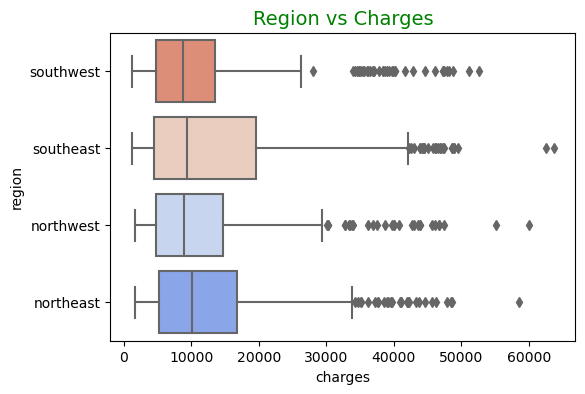

In [26]:
plt.rcParams["figure.figsize"]=(6,4)
plt.title("Region vs Charges", size=14, color="green")
sns.boxplot(y="region", x= "charges", data=df, palette = 'coolwarm_r',orient = 'h')
plt.show()

`Insight`

- **Average charge for northeast peoples are high than others**.
- **Highest charge for southeast peoples are high and average charges are same as 3 others regions**.

In [37]:
df.groupby(df.smoker).value_counts()

smoker  age  sex     bmi    children  region     charges   
no      19   male    30.59  0         northwest  1639.5631     2
        18   female  20.79  0         southeast  1607.5101     1
        56   female  26.60  1         northwest  12044.3420    1
                     35.80  1         southwest  11674.1300    1
                     33.82  2         northwest  12643.3778    1
                                                              ..
yes     23   female  36.67  2         northeast  38511.6283    1
                     32.78  2         southeast  36021.0112    1
                     31.40  0         southwest  34166.2730    1
                     28.49  1         southeast  18328.2381    1
        64   male    36.96  2         southeast  49577.6624    1
Length: 1337, dtype: int64

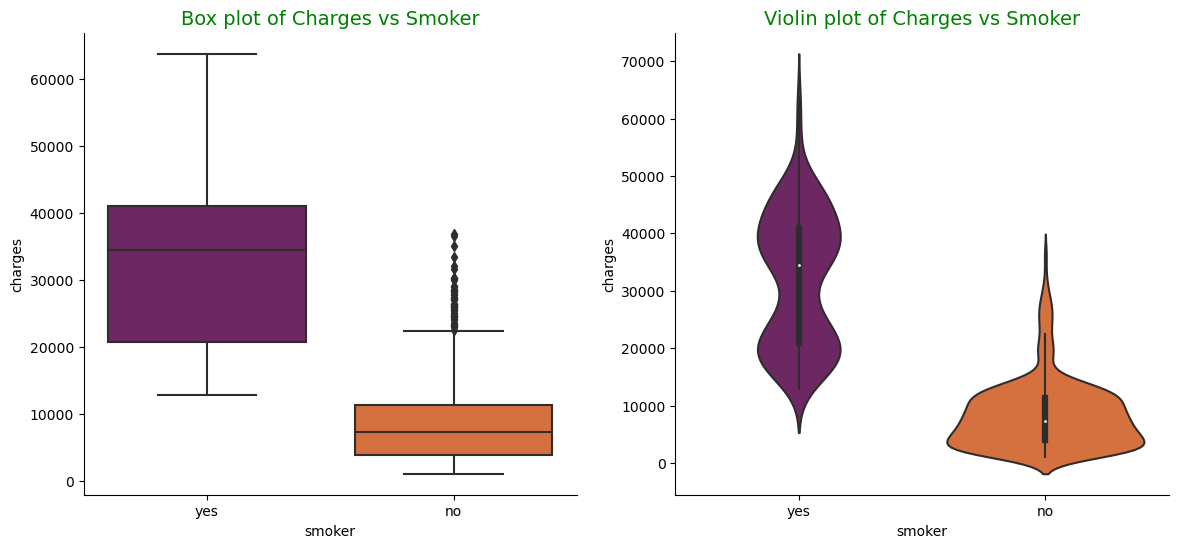

In [38]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
ax.set_title("Box plot of Charges vs Smoker", size=14, color="green")
sns.boxplot(x="smoker", y= df.columns[-1], data=df, palette = 'inferno', orient='v')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='inferno',ax=ax, orient='v')
sns.despine()
ax.set_title('Violin plot of Charges vs Smoker',size=14, color="green");

`Insight`

- From the both plots, We can say that the **charges for smoker are high for Insurance as compare to Non-smokers**.
- We can see a **huge difference in average charges between smoker and non-smoker(27000)** Which is (For **smoker:35000 and non-smoker:8000**.

In [39]:
male_sex_df = df[df.sex == "male"]
female_sex_df = df[df.sex == "female"]

In [40]:
male_sex_df.charges.mean()

13956.751177721886

In [41]:
female_sex_df.charges.mean()

12569.57884383534

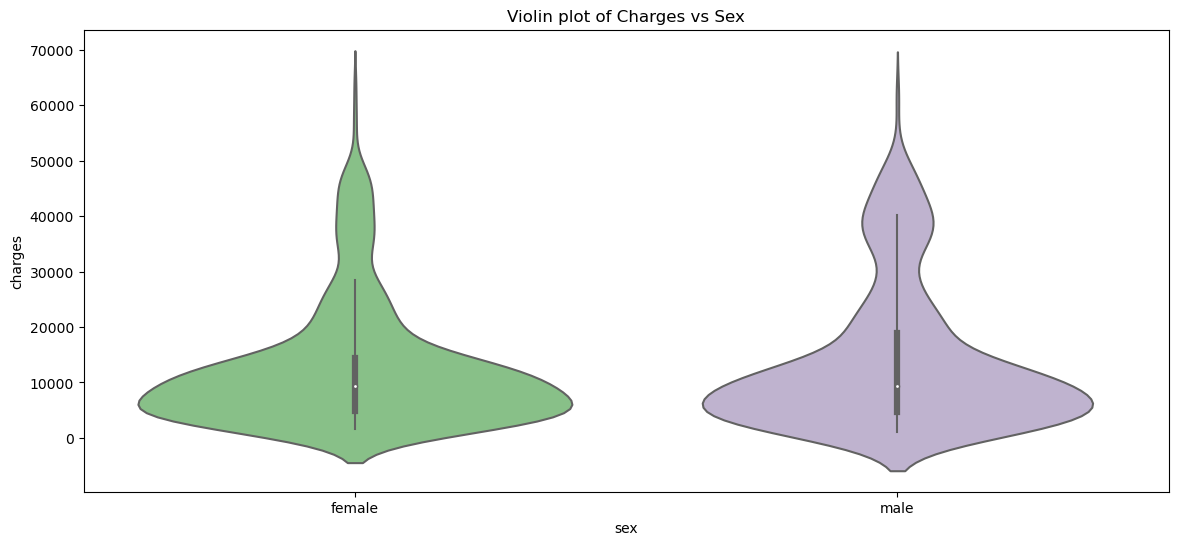

In [42]:
plt.figure(figsize=(14,6))
sns.violinplot(x='sex', y='charges',data=df,palette='Accent')
plt.title('Violin plot of Charges vs Sex')
plt.show()

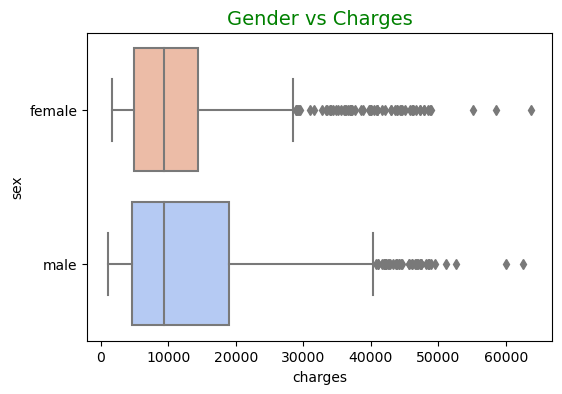

In [43]:
plt.rcParams["figure.figsize"]=(6,4)
plt.title("Gender vs Charges", size=14, color="green")
sns.boxplot(y="sex", x= df.columns[-1], data=df, palette = 'coolwarm_r',orient = 'h')
plt.show()

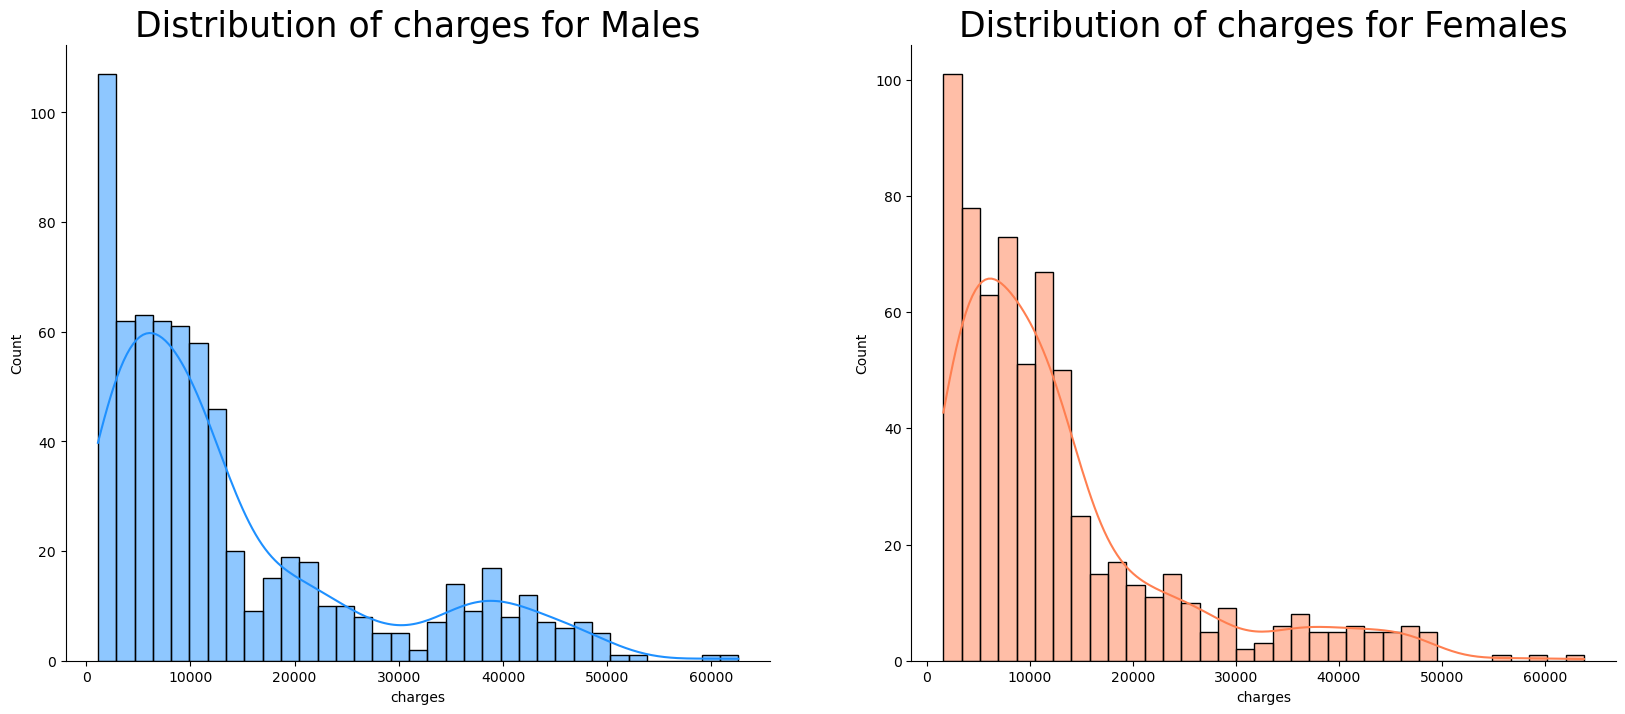

In [34]:
f= plt.figure(figsize=(20,8))

ax=f.add_subplot(121)
sns.histplot(df.query('sex == "male"'), x = 'charges', kde = True, color = 'dodgerblue', bins = 35)
ax.set_title('Distribution of charges for Males', fontsize = 25, )

ax=f.add_subplot(122)
sns.histplot(df.query('sex == "female"'), x = 'charges', kde = True, color = 'coral', bins = 35)
ax.set_title('Distribution of charges for Females', fontsize = 25,)
sns.despine()
plt.show()

`Insight`

- From the violin plot, **Average charge for male is slightly higher than female**.
- From the boxplot, Average charges of male is **13956** and female is **12569**. We can say the average charges are same for both sex.
    - **Maximum charges for male** is **approx 18000** which is **higher than female max charges**.
- From the distribution plot, we can say similar histogram for both sex.(female and male)

### 3 Multivariate Analysis

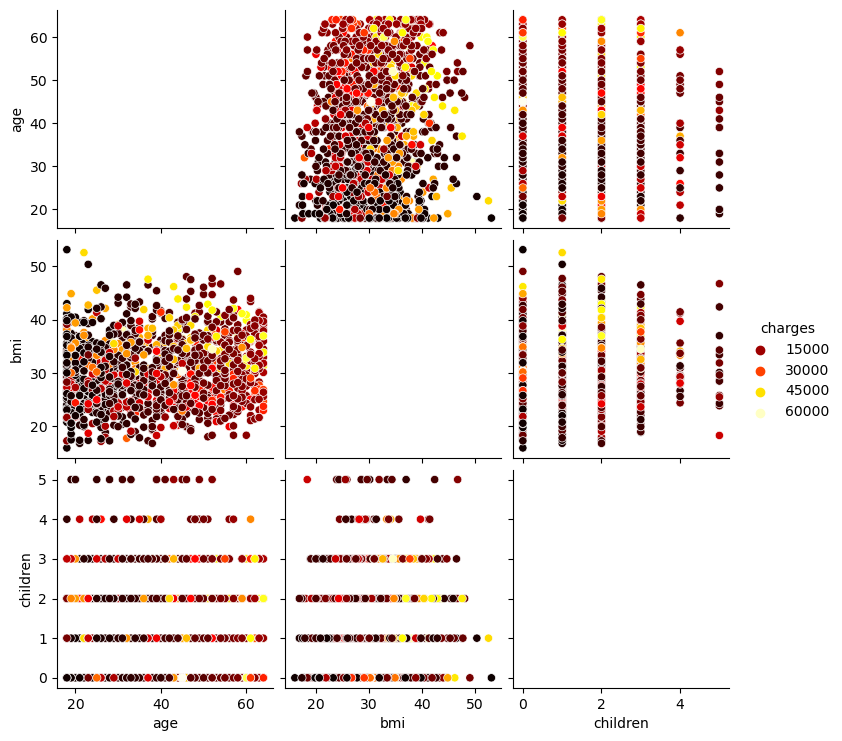

In [35]:
sns.pairplot(df, hue="charges",palette='hot')
plt.show()

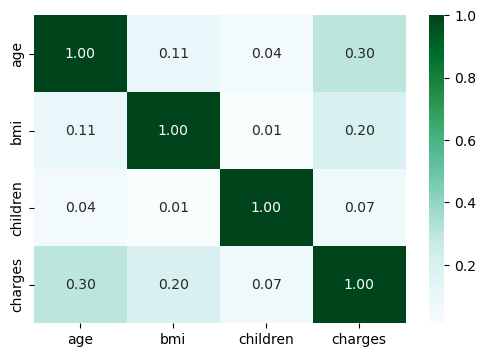

In [36]:
sns.heatmap(df.corr(),annot=True, cmap="BuGn",fmt="0.2f")
plt.show()

`Insight`

- In this plot, There are **very less multicolinearity in the dataset**.
- **Age is directly correlated to the charges of peoples**. Which mean if the age increase than Insurance charge also increases. 

# Handling Missing Value

**Checking missing value**

In [44]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

`Insight`

- **No missing values** are present in the dataset.

## 4. Data Modeling and Preprocessing

### 1. Data Preprocessing 

In [45]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


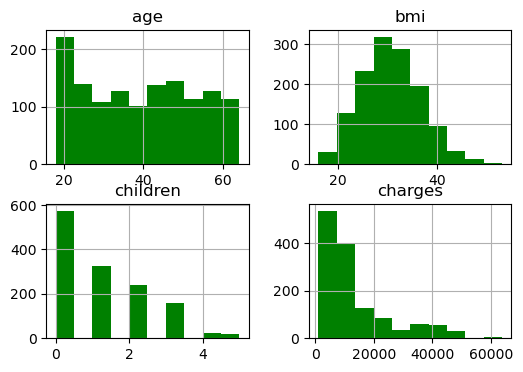

In [46]:
df.hist(color="g")
plt.show()

In [47]:
# using label encoder to convert categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

**Handling Categorical Variables**

In [48]:
le = LabelEncoder()

In [49]:
# transform smoker column
df["smoker"] = le.fit_transform(df["smoker"])

In [50]:
# transform sex column
df["sex"] = le.fit_transform(df["sex"])

In [51]:
# trandfom the region columns
df["region"] = le.fit_transform(df["region"])

In [169]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Data splitting**

In [53]:
# split the data into X and Y parts

X = df.drop("charges",1)

In [54]:
y = df.charges

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [56]:
# size of the splited dataset
X_train.shape, X_test.shape

((1070, 6), (268, 6))

**Scaling data using Standard Scaler**

In [57]:
# scalarization of data
sc = StandardScaler()
sc.fit_transform(X_train)

array([[-1.15786012,  0.99626864, -0.68882801, -0.92785237, -0.5174674 ,
         0.43244425],
       [-1.51663179, -1.00374533,  1.24518419, -0.92785237, -0.5174674 ,
         0.43244425],
       [ 0.77950689,  0.99626864,  2.31160214, -0.09635988, -0.5174674 ,
         0.43244425],
       ...,
       [ 1.28178723,  0.99626864,  0.5435502 , -0.92785237, -0.5174674 ,
        -0.47306524],
       [ 0.92301556, -1.00374533,  1.12112479,  0.73513261, -0.5174674 ,
        -0.47306524],
       [-0.22505378, -1.00374533, -1.78235828, -0.92785237, -0.5174674 ,
        -1.37857474]])

### 2. Data Modeling

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as mse
# import sklearn.metrics as sm
# print([x for x in dir(sm)])

#### Model 1 : Linear Regression

In [124]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [125]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [126]:
from math import sqrt
print("Mean Squared Error on Train : ", sqrt(mse(y_train, y_train_pred)))
print("Mean Squared Error on Test : ", sqrt(mse(y_test, y_test_pred)))


Mean Squared Error on Train :  6113.7602704223455
Mean Squared Error on Test :  5789.499432368471


In [127]:
print("R2 Score : on Train : ", r2_score(y_train, y_train_pred))
print("R2 Score : on Test : ", r2_score(y_test, y_test_pred))

R2 Score : on Train :  0.7471742980090954
R2 Score : on Test :  0.7624676741521533


#### Model 2 : xgBoost

In [128]:
#!pip install xgboost

In [129]:
import xgboost as xgb

In [130]:
def model(model):
    model.fit(X_train, y_train)
    print(f"for training {model}")
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ####################################
    # actual vs predicted plot
    plt.rcParams["figure.figsize"]=(15,5)
    c = [i for i in range(0, len(X_train), 1)]
    plt.plot(c, y_train, color="b")
    plt.plot(c, y_train_pred, color="r")
    plt.suptitle("Acutal vs Predicted plot of Train data", fontsize=15)
    plt.xlabel("Index")
    plt.ylabel("Accuracy")
    plt.legend(["Actual","Predicted"])
    plt.show()
    ###################################
    # actual vs predicted plot
    plt.rcParams["figure.figsize"]=(15,5)
    c = [i for i in range(0, len(X_test), 1)]
    plt.plot(c, y_test, color="b")
    plt.plot(c, y_test_pred, color="r")
    plt.suptitle("Acutal vs Predicted plot of Test data", fontsize=15)
    plt.xlabel("Index")
    plt.ylabel("Accuracy")
    plt.legend(["Actual","Predicted"])
    plt.show()
    ###################################

    from math import sqrt
    print("Mean Squared Error on Train : ", sqrt(mse(y_train, y_train_pred)))
    print("Mean Squared Error on Test : ", sqrt(mse(y_test, y_test_pred)))

    print("R2 Score : on Train : ", r2_score(y_train, y_train_pred))
    print("R2 Score : on Test : ", r2_score(y_test, y_test_pred))
    

for training XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


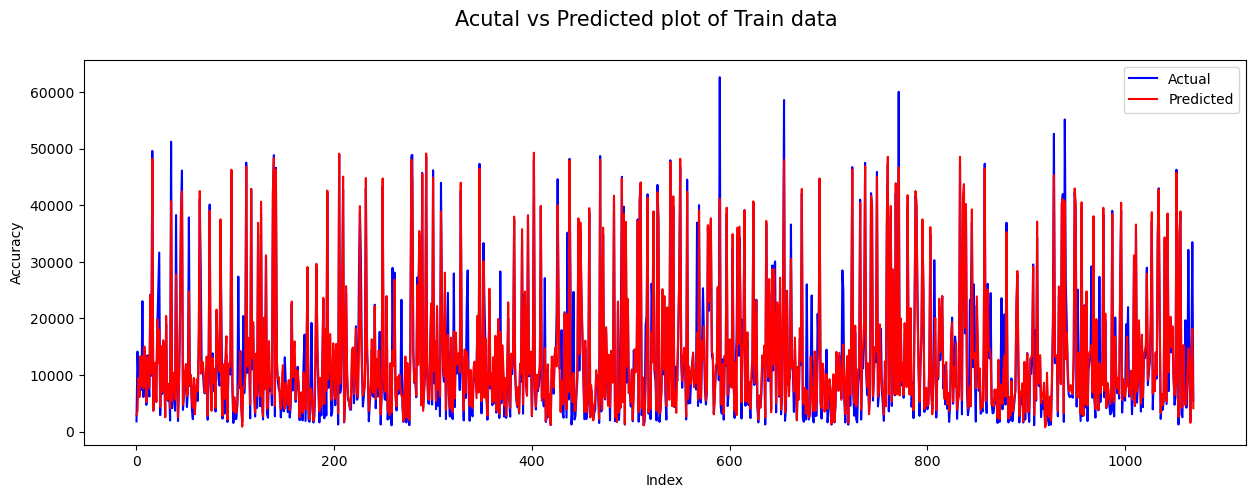

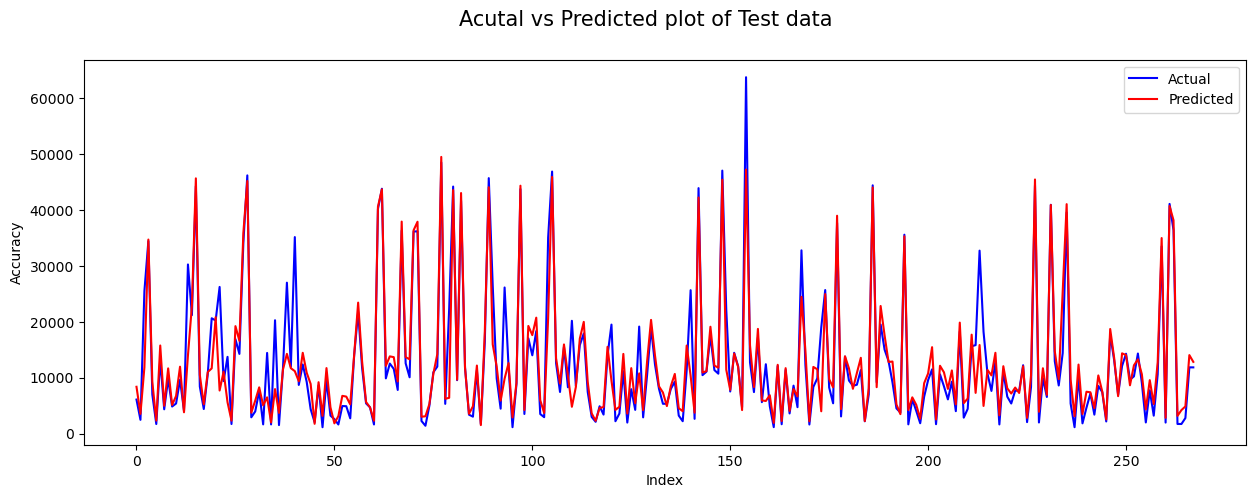

Mean Squared Error on Train :  3832.923688457972
Mean Squared Error on Test :  4496.309801290769
R2 Score : on Train :  0.9006278339258907
R2 Score : on Test :  0.8567306983697517


In [131]:
xgbr = xgb.XGBRegressor(max_depth=2, max_leaves=2)
model(xgbr)

#### Model 3 : RandomForestRegressor

In [132]:
from sklearn.ensemble import RandomForestRegressor

for training RandomForestRegressor(max_depth=9, min_samples_leaf=10)


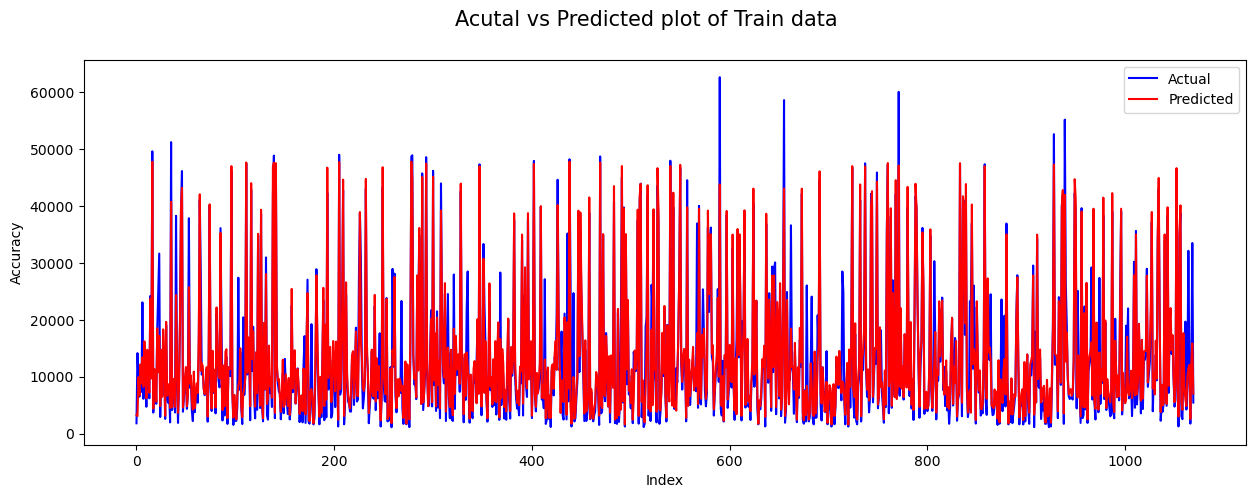

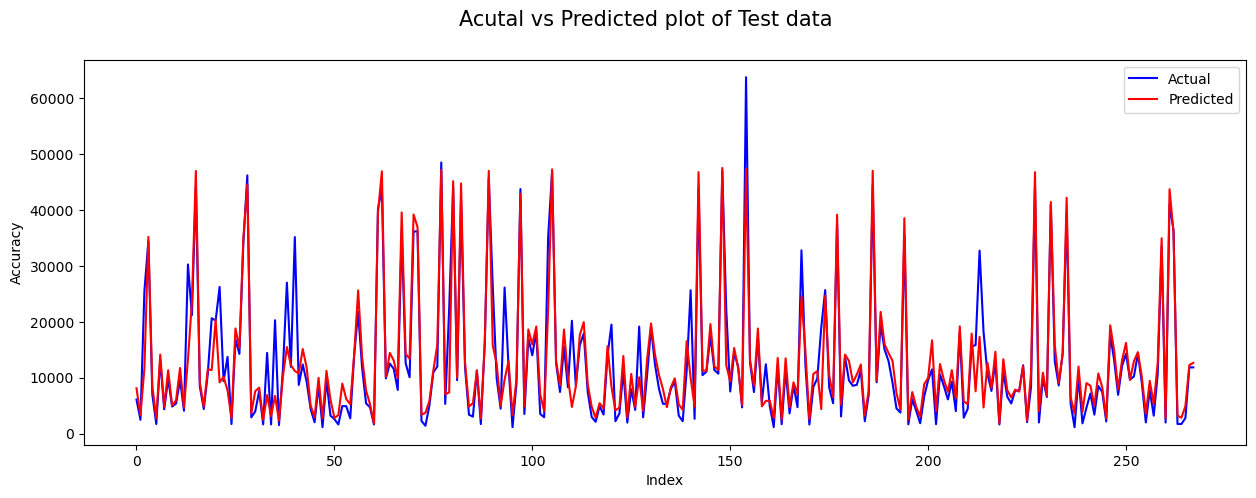

Mean Squared Error on Train :  3999.4005332260535
Mean Squared Error on Test :  4424.558937253142
R2 Score : on Train :  0.8918082336166498
R2 Score : on Test :  0.861266718512151


In [133]:
rfr = RandomForestRegressor(max_depth=9, min_samples_leaf=10)
model(rfr)

#### Model 4 : DecisionTreeRegressor

In [134]:
from sklearn.tree import DecisionTreeRegressor

for training DecisionTreeRegressor(max_depth=3, min_samples_leaf=15)


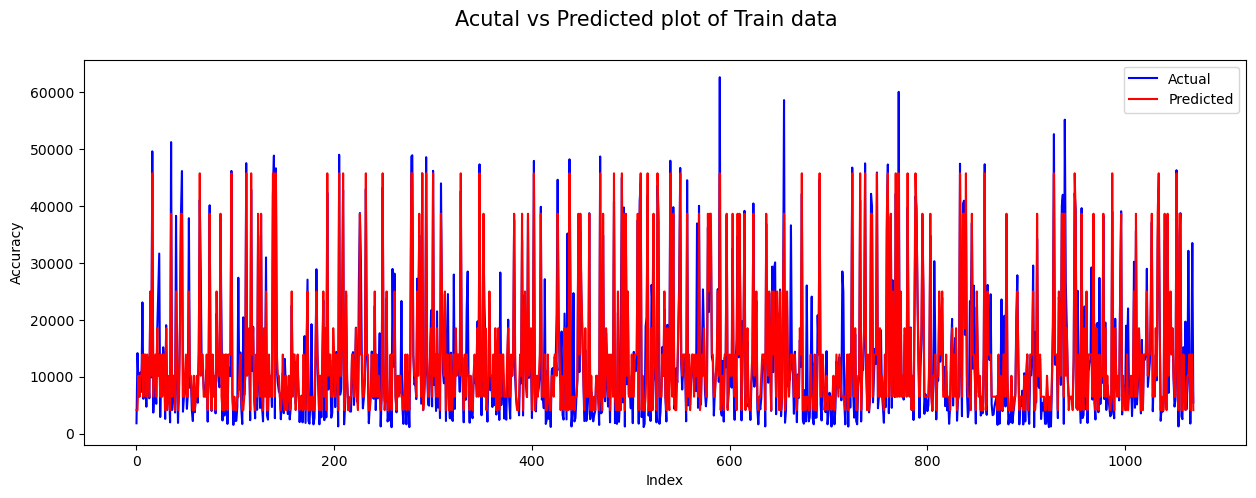

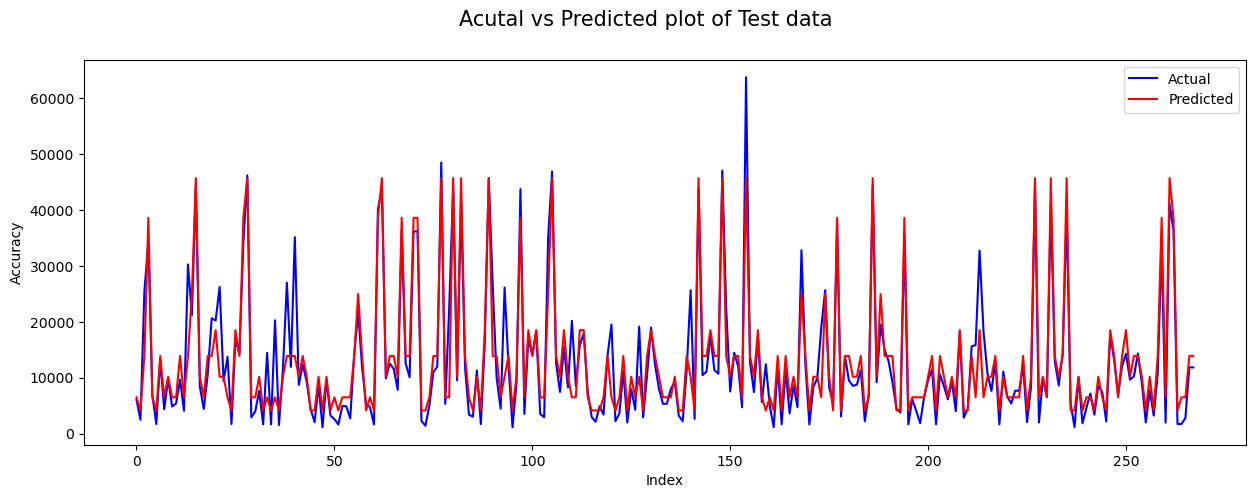

Mean Squared Error on Train :  4591.5293584290675
Mean Squared Error on Test :  4504.275285712901
R2 Score : on Train :  0.8574001258956839
R2 Score : on Test :  0.856222628284962


In [155]:
dtr = DecisionTreeRegressor(max_depth=3,min_samples_leaf=15)
model(dtr)

#### Model 5 : BaggingRegressor

In [145]:
from sklearn.ensemble import BaggingRegressor

for training BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                      min_samples_leaf=15),
                 n_estimators=1000, oob_score=True)


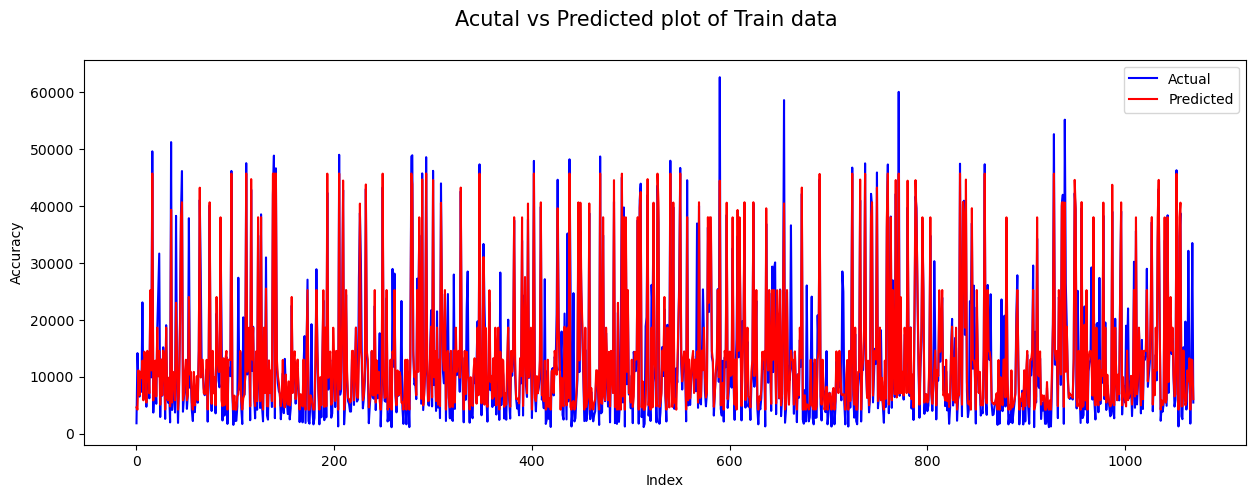

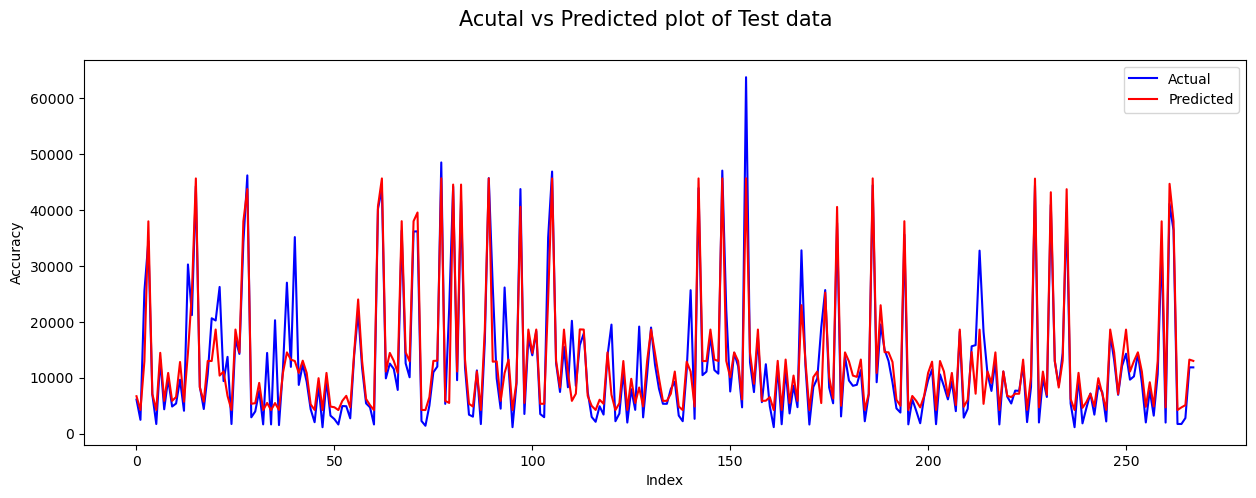

Mean Squared Error on Train :  4492.724785292985
Mean Squared Error on Test :  4443.8933138850125
R2 Score : on Train :  0.8634712726768314
R2 Score : on Test :  0.8600515998349814


In [156]:
br = BaggingRegressor(base_estimator=dtr, n_estimators=1000,max_samples=1.0,  bootstrap=True, oob_score=True)
model(br)

**Model Result Comparision**

In [ ]:
1. Linear Regression 
    R2 Score : on Train :  0.7471742980090954
    R2 Score : on Test :  0.7624676741521533
            
2. XgBoost Regressor
    R2 Score : on Train :  0.9006278339258907
    R2 Score : on Test :  0.8567306983697517
            
3. Randomforest Regressor
    R2 Score : on Train :  0.8918082336166498
    R2 Score : on Test :  0.861266718512151
            
4.  DecisionTreeRegressor
    R2 Score : on Train :  0.8574001258956839
    R2 Score : on Test :  0.856222628284962

5.  Bagging Regressor 
    R2 Score : on Train :  0.8634712726768314
    R2 Score : on Test :  0.8600515998349814  # best model out of all the models.

In [175]:
# save the model
import pickle 
pickle.dump(br, open("br_regression.pkl", "wb"))

In [176]:
#load the model
br = pickle.load(open("br_regression.pkl", "rb"))

In [177]:
br

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                      min_samples_leaf=15),
                 n_estimators=1000, oob_score=True)

## 5. Making Prediction of Charges for New Customer

**1. Here is the given data from the dataset (first row)**

**2. Here is the given data from the dataset (1335 row)**

**3. Here is the given data from the dataset (last row)**

In [ ]:
age sex bmi childern smoker region charge
61	0	29.07	0	1	1	29141.3603

In [163]:
data = {'age':61,
        "sex":0,
        "bmi":29.07,
       "children":0,
       'smoker':1,
       "region":1}
df_new = pd.DataFrame(data, index=[0])
df_new
pred_price = br.predict(df_new)
print(f"Prediction price is : {pred_price}")

Prediction price is : [25222.11090772]


## 6. GUI APP 

**Pipeline for the data prediciton on insurance cost prediciton**

In [166]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    #load the model
    dtr = pickle.load(open("dtr_regression.pkl", "rb"))
    model_prediction = br.predict([[p1,p2,p3,p4,p5,p6]])
    
    # Label to show the result
    Label(root, text="Insurance Cost").grid(row=7)
    Label(root, text=model_prediction).grid(row=8)

from tkinter import *
root = Tk()
root.title("Insurance Cost Prediction")
label =Label(root, text="Insurance Cost prediction", bg="black", fg="white").grid(row=0, columnspan=2)
Label(root, text="Enter Your Age").grid(row=1)
Label(root, text="Male or Female [1/0]").grid(row=2)
Label(root, text="Enter BMI value").grid(row=3)
Label(root, text="Enter number of children").grid(row=4)
Label(root, text="Smoker Yes/No [1/0] ").grid(row=5)
Label(root, text="Region [1/4]").grid(row=6)

e1 = Entry(root)
e2 = Entry(root)
e3 = Entry(root)
e4 = Entry(root)
e5 = Entry(root)
e6 = Entry(root)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(root, text="Predict", command=show_entry).grid()
mainloop()
